# Exemplar: Explore probability distributions

## **Introduction**

We are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, We will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports**

In [9]:
# Importing relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [11]:
# Load data into a DataFrame and save in a variable.

data = pd.read_csv("modified_c4_epa_air_quality.csv")

## **Step 2: Data exploration** 

Displaying the first 10 rows of the data to get a sense of how the data is structured.

In [16]:
# Display first 10 rows of the data.

data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [18]:
# Display number of rows, number of columns.

data.shape

(260, 8)

Now, to find out whether `aqi_log` fits a specific type of probability distribution. We create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

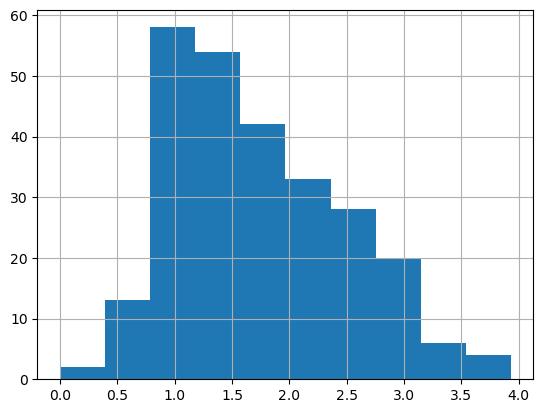

In [21]:
# Creating a histogram to visualize distribution of aqi_log.

data["aqi_log"].hist();

THe shape of the histogram appears as a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

## **Step 3: Statistical tests**

Now we use the empirical rule to observe the data, then test and verify that it is normally distributed.

 As we have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

First, we define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help us easily access these measures as we continue with the calculations involved in applying the empirical rule. 

In [29]:
# Defining variable for aqi_log mean.

mean_aqi_log = data["aqi_log"].mean()


# Print out the mean.

print(mean_aqi_log)

1.7669210929985582


In [33]:
# Defining variable for aqi_log standard deviation.

std_aqi_log = data["aqi_log"].std()


# Print out the standard deviation.

print(std_aqi_log)

0.7147155520223721


Now, we check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, we define the lower limit and the upper limit. This will enable us to create a range and confirm whether each value falls within it.

In [36]:
# Defining variable for lower limit, 1 standard deviation below the mean.

lower_limit = mean_aqi_log - 1 * std_aqi_log

# Defining variable for upper limit, 1 standard deviation above the mean.

upper_limit = mean_aqi_log + 1 * std_aqi_log

# Displaying lower_limit, upper_limit.

print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [38]:
# Displaying the actual percentage of data that falls within 1 standard deviation of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

Now, we consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

In [42]:
# Defining variable for lower limit, 2 standard deviations below the mean.

lower_limit = mean_aqi_log - 2 * std_aqi_log

# Defining variable for upper limit, 2 standard deviations below the mean.

upper_limit = mean_aqi_log + 2 * std_aqi_log

# Displaying lower_limit, upper_limit.

print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [44]:
# Displaying the actual percentage of data that falls within 2 standard deviations of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

Now, we consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

In [49]:
# Define variable for lower limit, 3 standard deviations below the mean.

lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.

upper_limit = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.

print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [51]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

## **Step 4: Results and evaluation** 

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

**Question:** How would we use z-score to find outliers?

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

Computing the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [58]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.

data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


Identifying the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [61]:
# Displaying data where `aqi_log` is above or below 3 standard deviations of the mean

data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


**Question:** What do we observe about potential outliers based on the calculations?

The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of Data Analysis? 

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements. 

For example, if the `aqi_log` for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

## **Considerations**

**What are some key takeaways we learned?**

- Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.
- The empirical rule can be used to verify whether a distribution is normal.
- The mean and standard deviation are important measures when applying the empirical rule to a distribution.
- Z-score allows you to identify potenial outliers in the data.

**What summary would we provide to stakeholders?**
- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- Consider allocating more resources toward further examining this site in order to improve its air quality.